In [1]:
########################################
import os
import re
import json
import random
import pickle
import operator
import itertools

import numpy
import sklearn.ensemble
import sklearn.linear_model
import sklearn.feature_extraction
import pandas
import html
#import raha
########################################

In [2]:
import os
import re
import io
import sys
import math
import json
import html
import pickle
import difflib
import unicodedata
import bs4
import bz2
import py7zr
import numpy
import mwparserfromhell
import libarchive.public
#import dataset
import wikitextparser as wtp
from pprint import pprint
from wikitextparser import remove_markup, parse
import datetime
from pandas import DataFrame
import random
import pickle
import pandas as pd
import logging
from datasets import *
import pandas

In [3]:
def evaluate_model (total_error, total_error_to_repair, total_correction):
        if total_error_to_repair==0:
            precision=0.00
        else:
            precision=total_correction/total_error_to_repair
            precision=round(precision,2)
        if total_error==0:
            recall=0.00
        else:
            recall=total_correction/total_error
            recall=round(recall,2)
        if (precision+recall)==0:
            f_score=0.00
        else:
            f_score=(2 * precision * recall) / (precision + recall) 
            f_score=round(f_score,2)     
        return precision, recall,f_score

In [20]:
dataset_name="hospital"
path= os.path.abspath(os.path.join( "datasets", dataset_name, "repaired_updated.csv"))

In [21]:
dataframe = pandas.read_csv(path)
#dataframe

In [24]:
fds="rate"

In [28]:
k=dataframe[fds].dtypes
if k=="float64":
    print('yes')

yes


In [22]:
# New version 16.01.2021
# THreshold and coeeficient fixed
total_error=4920
total_error_to_reapir=0
total_repair=0
coeff_e=0
prob_e=0
prob_f=0
threshold=0.75
repaired=None
aggre_prob=coeff_e*prob_e+(1-coeff_e)*prob_f
for coeff in [0.50]:
    total_error_to_reapir=0
    total_repair=0
    for actual, repair_e, prob_e, repair_f,prob_f in zip(dataframe['actual'],dataframe['edit'],dataframe['prob_e'],dataframe['fasttext'],dataframe['prob_f']):
        aggre_prob=coeff*prob_e+(1-coeff)*prob_f
        if repair_e !="NAE" and repair_f!="NAE" and repair_e==repair_f and prob_e>=0.50:
            total_error_to_reapir=total_error_to_reapir+1
            repaired=repair_e    
            if actual==repaired:
                total_repair=total_repair+1 
        elif coeff==0:
            if prob_f>=0.99 and repair_f!="NAE" and aggre_prob>=threshold:
                total_error_to_reapir=total_error_to_reapir+1
                repaired=repair_f
                if actual==repaired:
                    total_repair=total_repair+1 
        elif coeff==1:
            if prob_e>=0.50 and repair_e !="NAE" and repair_e and aggre_prob>=threshold:
                total_error_to_reapir=total_error_to_reapir+1
                repaired=repair_f
                if actual==repaired:
                    total_repair=total_repair+1    
        elif prob_f>=0.90 and repair_f!="NAE" and aggre_prob>=threshold:
            total_error_to_reapir=total_error_to_reapir+1
            repaired=repair_f
            if actual==repaired:
                total_repair=total_repair+1
        elif prob_e>=0.50 and repair_e !="NAE" and repair_e and aggre_prob>=threshold:
            total_error_to_reapir=total_error_to_reapir+1
            repaired=repair_e
            if actual==repaired:
                total_repair=total_repair+1   

    p,r,f=evaluate_model(total_error,total_error_to_reapir,total_repair)
    print(coeff,p,total_repair,total_error_to_reapir)


0.5 1.0 229 230


In [8]:
f

0.02

In [23]:
# THreshold and coeeficient fixed
total_error=4920
total_error_to_reapir=0
total_repair=0
coeff_e=0
prob_e=0
prob_f=0
threshold=0.75
repaired=None
aggre_prob=coeff_e*prob_e+(1-coeff_e)*prob_f
for coeff in [0.50]:
    total_error_to_reapir=0
    total_repair=0
    for actual, repair_e, prob_e, repair_f,prob_f in zip(dataframe['actual'],dataframe['edit'],dataframe['prob_e'],dataframe['fasttext'],dataframe['prob_f']):
        if repair_e=="NAE":
            prob_e=0
        if repair_f=="NAE":
            prob_f=0       
        aggre_prob=coeff*prob_e+(1-coeff)*prob_f
        if repair_e !="NAE" and repair_f!="NAE" and repair_e==repair_f and prob_e>=0.50:
            total_error_to_reapir=total_error_to_reapir+1
            repaired=repair_e    
            if actual==repaired:
                total_repair=total_repair+1 
        elif coeff==0:
            if prob_f>=.90 and repair_f!="NAE" and aggre_prob>=threshold:
                total_error_to_reapir=total_error_to_reapir+1
                repaired=repair_f
                if actual==repaired:
                    total_repair=total_repair+1 
        elif coeff==1:
            if prob_e>=0.50 and repair_e !="NAE" and repair_e and aggre_prob>=threshold:
                total_error_to_reapir=total_error_to_reapir+1
                repaired=repair_f
                if actual==repaired:
                    total_repair=total_repair+1    
        elif prob_f>=.90 and repair_f!="NAE" and aggre_prob>=threshold:
            total_error_to_reapir=total_error_to_reapir+1
            repaired=repair_f
            if actual==repaired:
                total_repair=total_repair+1
        elif prob_e>=0.50 and repair_e !="NAE" and repair_e and aggre_prob>=threshold:
            total_error_to_reapir=total_error_to_reapir+1
            repaired=repair_f
            if actual==repaired:
                total_repair=total_repair+1   

p,r,f=evaluate_model(total_error,total_error_to_reapir,total_repair)
print(p,r,f,total_repair)


1.0 0.05 0.1 229


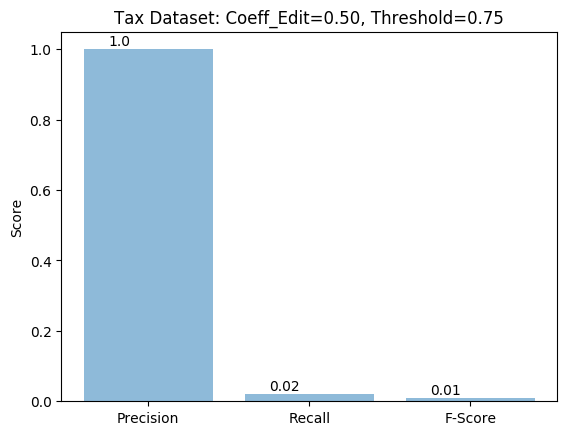

In [39]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects =  ['Precision', 'Recall', 'F-Score']
y_pos = np.arange(len(objects))
performance = [1.00,0.02,0.01]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)

for i, v in enumerate(performance):
    plt.text(y_pos[i] - 0.25, v + 0.01, str(v))


plt.ylabel('Score')
plt.title('Tax Dataset: Coeff_Edit=0.50, Threshold=0.75')

plt.show()

In [24]:
# THreshold fixed and coefficient variants
# THreshold and coeeficient fixed
total_error=4920
total_error_to_reapir=0
total_repair=0
coeff_e=0
prob_e=0
prob_f=0
threshold=0.75
repaired=None
aggre_prob=coeff_e*prob_e+(1-coeff_e)*prob_f
for coeff in [0.00,0.25,0.50,0.75,1.00]:
   # total_error=4920
    total_error_to_reapir=0
    total_repair=0
    coeff_e=0
    prob_e=0
    prob_f=0
    threshold=0.75
    repaired=None
    total_error_to_reapir=0
    total_repair=0
    for actual, repair_e, prob_e, repair_f,prob_f in zip(dataframe['actual'],dataframe['edit'],dataframe['prob_e'],dataframe['fasttext'],dataframe['prob_f']):
        aggre_prob=coeff*prob_e+(1-coeff)*prob_f
        if repair_e !="NAE" and repair_f!="NAE" and repair_e==repair_f and prob_e>=0.50:
            total_error_to_reapir=total_error_to_reapir+1
            repaired=repair_e    
            if actual==repaired:
                total_repair=total_repair+1 
        elif coeff==0:
            if prob_f>=0.99 and repair_f!="NAE" and aggre_prob>=threshold:
                total_error_to_reapir=total_error_to_reapir+1
                repaired=repair_f
                if actual==repaired:
                    total_repair=total_repair+1 
        elif coeff==1:
            if prob_e>=0.50 and repair_e !="NAE" and repair_e and aggre_prob>=threshold:
                total_error_to_reapir=total_error_to_reapir+1
                repaired=repair_f
                if actual==repaired:
                    total_repair=total_repair+1    
        elif prob_f>=0.90 and repair_f!="NAE" and aggre_prob>=threshold:
            total_error_to_reapir=total_error_to_reapir+1
            repaired=repair_f
            if actual==repaired:
                total_repair=total_repair+1
        elif prob_e>=0.50 and repair_e !="NAE" and repair_e and aggre_prob>=threshold:
            total_error_to_reapir=total_error_to_reapir+1
            repaired=repair_e
            if actual==repaired:
                total_repair=total_repair+1   

    p,r,f=evaluate_model(total_error,total_error_to_reapir,total_repair)
    print(coeff,p,total_repair,total_error_to_reapir)



0.0 0.99 232 235
0.25 0.93 241 259
0.5 1.0 229 230
0.75 1.0 229 230
1.0 1.0 229 230


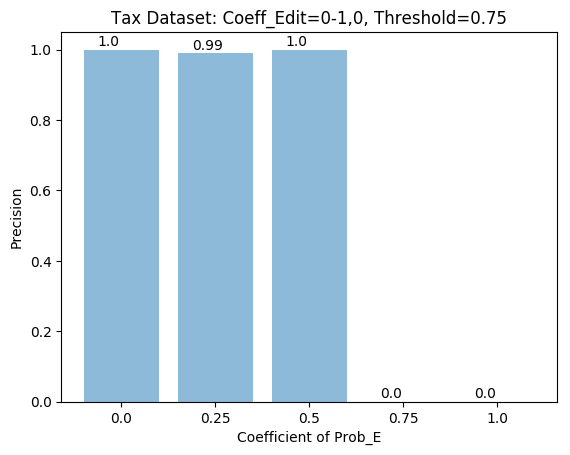

In [42]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects =  [0.00,0.25,0.50,0.75,1.00]
y_pos = np.arange(len(objects))
performance = [1.0,0.99,1.0,0.0,0.0]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)

for i, v in enumerate(performance):
    plt.text(y_pos[i] - 0.25, v + 0.01, str(v))


plt.ylabel('Precision')
plt.xlabel('Coefficient of Prob_E')
plt.title('Tax Dataset: Coeff_Edit=0-1,0, Threshold=0.75')

plt.show()

In [25]:
# THreshold variants and coefficient fixed
# THreshold and coeeficient fixed
total_error=121219
total_error_to_reapir=0
total_repair=0
coeff_e=0
prob_e=0
prob_f=0
coeff=0.50
repaired=None
aggre_prob=coeff_e*prob_e+(1-coeff_e)*prob_f
for threshold in [0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90]:
   # total_error=4920
    total_error_to_reapir=0
    total_repair=0
    coeff_e=0
    prob_e=0
    prob_f=0
   # threshold=0.75
    repaired=None
    total_error_to_reapir=0
    total_repair=0
    for actual, repair_e, prob_e, repair_f,prob_f in zip(dataframe['actual'],dataframe['edit'],dataframe['prob_e'],dataframe['fasttext'],dataframe['prob_f']):
        aggre_prob=coeff*prob_e+(1-coeff)*prob_f
        if repair_e !="NAE" and repair_f!="NAE" and repair_e==repair_f and prob_e>=0.50:
            total_error_to_reapir=total_error_to_reapir+1
            repaired=repair_e    
            if actual==repaired:
                total_repair=total_repair+1 
        elif coeff==0:
            if prob_f>=0.99 and repair_f!="NAE" and aggre_prob>=threshold:
                total_error_to_reapir=total_error_to_reapir+1
                repaired=repair_f
                if actual==repaired:
                    total_repair=total_repair+1 
        elif coeff==1:
            if prob_e>=0.50 and repair_e !="NAE" and repair_e and aggre_prob>=threshold:
                total_error_to_reapir=total_error_to_reapir+1
                repaired=repair_f
                if actual==repaired:
                    total_repair=total_repair+1    
        elif prob_f>=0.90 and repair_f!="NAE" and aggre_prob>=threshold:
            total_error_to_reapir=total_error_to_reapir+1
            repaired=repair_f
            if actual==repaired:
                total_repair=total_repair+1
        elif prob_e>=0.50 and repair_e !="NAE" and repair_e and aggre_prob>=threshold:
            total_error_to_reapir=total_error_to_reapir+1
            repaired=repair_f
            if actual==repaired:
                total_repair=total_repair+1  
        #print(aggre_prob)

    p,r,f=evaluate_model(total_error,total_error_to_reapir,total_repair)
    print(threshold,p,total_repair,total_error_to_reapir)



0.1 0.72 246 340
0.2 0.72 246 340
0.3 0.75 246 330
0.4 0.8 246 306
0.5 0.88 243 275
0.6 0.91 242 267
0.7 0.93 239 258
0.8 1.0 229 230
0.9 1.0 229 230


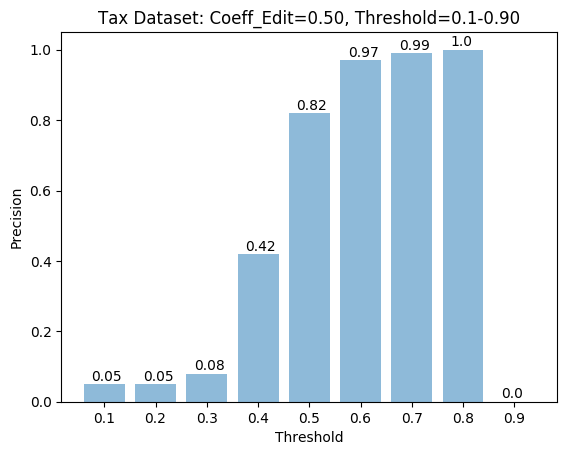

In [44]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects =  [0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90]
y_pos = np.arange(len(objects))
performance = [0.05,0.05,0.08,0.42,0.82,0.97,0.99,1.0,0.0]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)

for i, v in enumerate(performance):
    plt.text(y_pos[i] - 0.25, v + 0.01, str(v))


plt.ylabel('Precision')
plt.xlabel('Threshold')
plt.title('Tax Dataset: Coeff_Edit=0.50, Threshold=0.1-0.90')

plt.show()

In [13]:
dataset_name="flights"
path= os.path.abspath(os.path.join( "datasets", dataset_name, "repaired_updated.csv"))
dataframe = pandas.read_csv(path)

# Back up

In [ ]:
total_error=509
total_error_to_reapir=0
total_repair=0
coeff_e=0
prob_e=0
prob_f=0
threshold=0.30
repaired=None
aggre_prob=coeff_e*prob_e+(1-coeff_e)*prob_f
for coeff in [1.00]:
    total_error_to_reapir=0
    total_repair=0
    for actual, repair_e, prob_e, repair_f,prob_f in zip(dataframe['actual'],dataframe['edit'],dataframe['prob_e'],dataframe['fasttext'],dataframe['prob_f']):
        aggre_prob=coeff*prob_e+(1-coeff)*prob_f
        if coeff==0:
            if prob_f>=0.99 and repair_f!="NAE" and aggre_prob>=threshold:
                total_error_to_reapir=total_error_to_reapir+1
                repaired=repair_f
                if actual==repaired:
                    total_repair=total_repair+1 
        elif coeff==1:
            if prob_e>=0.50 and repair_e !="NAE" and repair_e and aggre_prob>=threshold:
                total_error_to_reapir=total_error_to_reapir+1
                repaired=repair_f
                if actual==repaired:
                    total_repair=total_repair+1    
        elif repair_e !="NAE" and repair_f!="NAE" and repair_e==repair_f and prob_e>=0.50 and aggre_prob>=threshold:
            total_error_to_reapir=total_error_to_reapir+1
            repaired=repair_e    
            if actual==repaired:
                total_repair=total_repair+1 
        elif prob_f>=0.99 and repair_f!="NAE" and aggre_prob>=threshold:
            total_error_to_reapir=total_error_to_reapir+1
            repaired=repair_f
            if actual==repaired:
                total_repair=total_repair+1
        elif prob_e>=0.50 and repair_e !="NAE" and repair_e and aggre_prob>=threshold:
            total_error_to_reapir=total_error_to_reapir+1
            repaired=repair_f
            if actual==repaired:
                total_repair=total_repair+1   

p,r,f=evaluate_model(total_error,total_error_to_reapir,total_repair)
print(p,r,f,total_repair,total_error_to_reapir)